In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [56]:
nba_mvp_history = pd.read_csv("Datasets/mvps_stats_all_seasons_revised.csv")
nba_mvp_history.head()

,Unnamed: 0,Season,Rank,Player,Pos,Age,G,MP,PTS,AST,...,eFG%,FT%,PF,WS,WS/48,First,Pts Won,Pts Max,Share,MVP
0,0,1996-97,1,Karl Malone,PF,33,82,36.6,27.4,4.5,...,0.550,0.755,2.6,16.7,0.268,63,986,1150,0.857,1
1,1,1996-97,2,Michael Jordan,SG,33,82,37.9,29.6,4.3,...,0.516,0.833,1.9,18.3,0.283,52,957,1150,0.832,0
2,2,1996-97,3,Grant Hill,SF,24,80,39.3,21.4,7.3,...,0.500,0.711,2.3,14.6,0.223,0,376,1150,0.327,0
3,3,1996-97,4,Tim Hardaway,PG,30,81,38.7,20.3,8.6,...,0.489,0.799,2.0,12.9,0.198,0,238,1150,0.207,0
4,4,1996-97,5,Glen Rice,SF,29,79,42.6,26.8,2.0,...,0.546,0.867,2.4,10.8,0.154,0,134,1150,0.117,0


In [57]:
nba_mvp_history.drop(columns = ['Unnamed: 0', 'Rank', 'Pos'], inplace = True)

In [58]:
nba_mvp_history

,Season,Player,Age,G,MP,PTS,AST,TRB,STL,BLK,...,eFG%,FT%,PF,WS,WS/48,First,Pts Won,Pts Max,Share,MVP
0,1996-97,Karl Malone,33,82,36.6,27.4,4.5,9.9,1.4,0.6,...,0.550,0.755,2.6,16.7,0.268,63,986,1150,0.857,1
1,1996-97,Michael Jordan,33,82,37.9,29.6,4.3,5.9,1.7,0.5,...,0.516,0.833,1.9,18.3,0.283,52,957,1150,0.832,0
2,1996-97,Grant Hill,24,80,39.3,21.4,7.3,9.0,1.8,0.6,...,0.500,0.711,2.3,14.6,0.223,0,376,1150,0.327,0
3,1996-97,Tim Hardaway,30,81,38.7,20.3,8.6,3.4,1.9,0.1,...,0.489,0.799,2.0,12.9,0.198,0,238,1150,0.207,0
4,1996-97,Glen Rice,29,79,42.6,26.8,2.0,4.0,0.9,0.3,...,0.546,0.867,2.4,10.8,0.154,0,134,1150,0.117,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,2022-23,Stephen Curry,34,56,34.7,29.4,6.3,6.1,0.9,0.4,...,0.614,0.915,2.1,7.8,0.192,0,5,1000,0.005,0
394,2022-23,Jimmy Butler,33,64,33.4,22.9,5.3,5.9,1.8,0.3,...,0.560,0.850,1.3,12.3,0.277,0,3,1000,0.003,0
395,2022-23,De'Aaron Fox,25,73,33.4,25.0,6.1,4.2,1.1,0.3,...,0.557,0.780,2.4,7.4,0.146,0,2,1000,0.002,0
396,2022-23,Jalen Brunson,26,68,35.0,24.0,6.2,3.5,0.9,0.2,...,0.547,0.829,2.2,8.7,0.175,0,1,1000,0.001,0


In [89]:
nba_mvp_history['Age'] = pd.to_numeric(nba_mvp_history['Age'], errors='coerce')

In [148]:
# First we want to determine the correlation between the player statistics, against First place points, 
# Points won, and points share

columns1 = ['Age', 'G', 'MP', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'FG%', 'eFG%', 'PF', 'WS', 'WS/48']
columns2 = ['Age', 'G', 'MP', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'FG%', 'eFG%', 'PF', 'WS', 'WS/48', 'First', 'Pts Won', 'Share']
target = 'First'
target2 = 'Pts Won'
target3 = 'Share'
target4 = 'MVP'

In [151]:
# Create a fucntion to make heatmaps for correlations

def correlation_heatmap(col, x, y, top_n, path):
    df = nba_mvp_history[col + [x]]
    df

    corr_matrix = df.corr()
    corr_w_target = corr_matrix[x]
    
    top_features = corr_w_target.abs().sort_values(ascending = False).head(top_n).index

    plt.figure(figsize = (10,5))
    sns.heatmap(corr_matrix.loc[top_features, top_features], annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = .5)
    plt.title(f"Top {top_n} Features vs {y} Correlation")
    plt.savefig(path)
    plt.show()

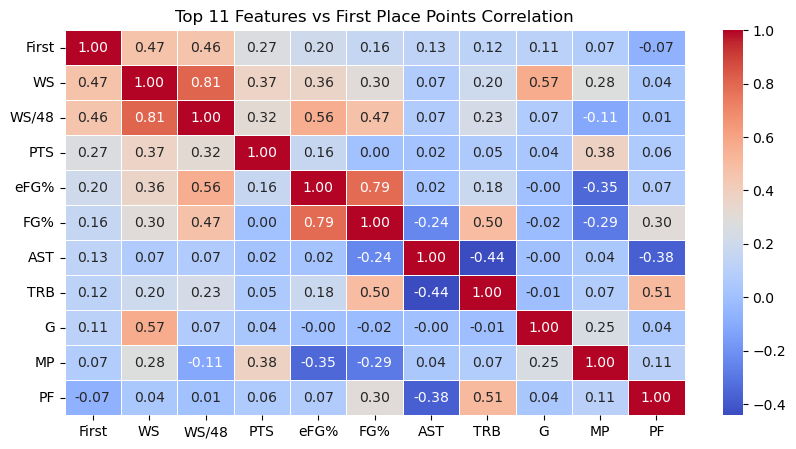

In [154]:
# Stats vs First Place Points Correlation

correlation_heatmap(col = columns1, x = target, y = 'First Place Points', top_n = 11, path = "Charts/First Place Points Correlation")

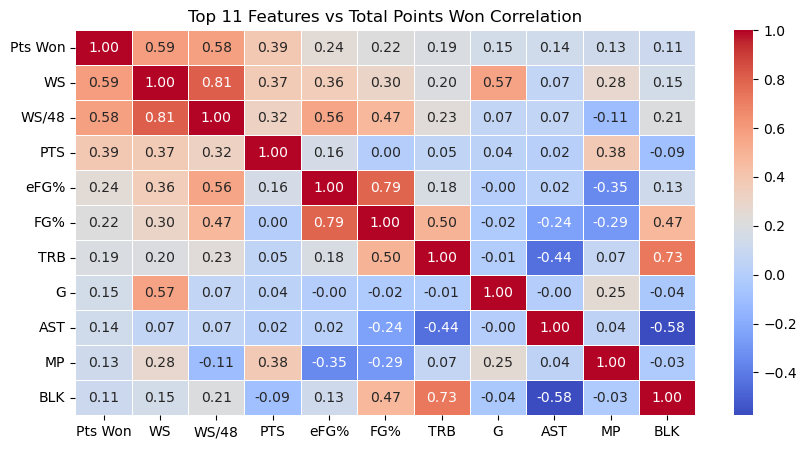

In [155]:
# Stats vs Total Points Won Correlation

correlation_heatmap(col = columns1, x = target2, y = 'Total Points Won', top_n = 11, path = "Charts/Total Points Won Correlation")

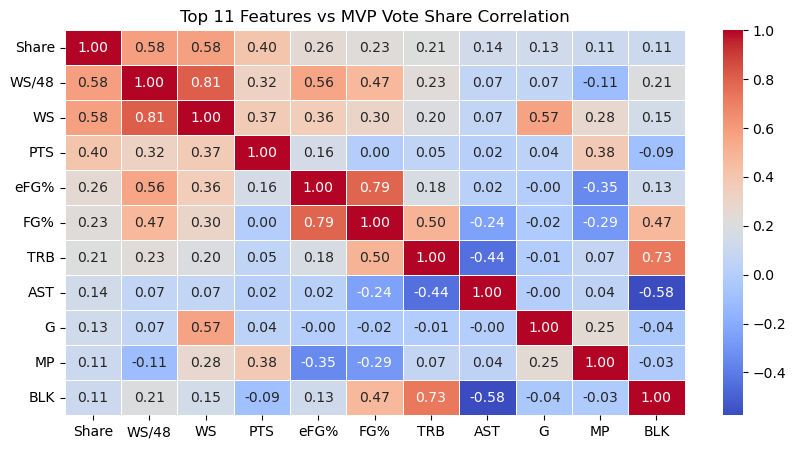

In [157]:
# Stats vs MVP Vote Share Correlation

correlation_heatmap(col = columns1, x = target3, y = 'MVP Vote Share', top_n = 11, path = "Charts/MVP Vote Share Correlation")

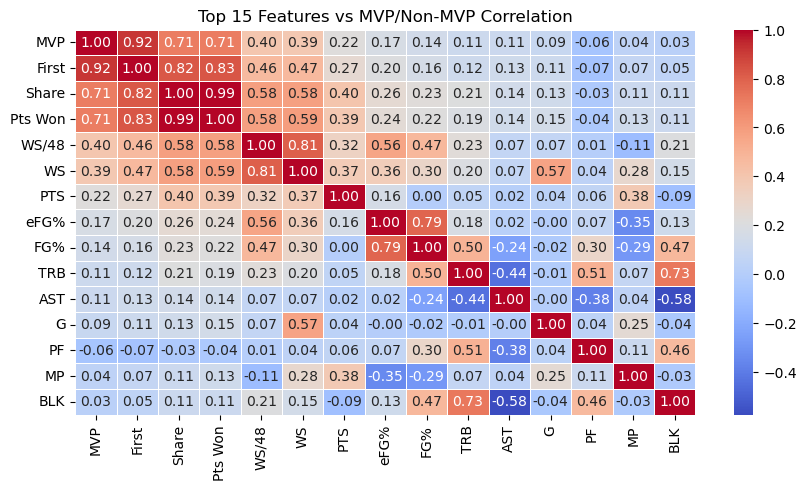

In [160]:
# All Stats vs MVP/Non-MVP Correlation

correlation_heatmap(col = columns2, x = target4, y = 'MVP/Non-MVP', top_n = 15, path = "Charts/MVP Correlation")

In [21]:
mvp.columns[2:16]

Index(['Age', 'G', 'MP', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'FG%', 'eFG%',
       'FT%', 'PF', 'WS', 'WS/48'],
      dtype='object')

In [ ]:
mvp.describe()

In [ ]:
features = mvp.columns[1:15]

X = mvp[features]
y = mvp['MVP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

In [ ]:
y

In [ ]:
lr_model = LogisticRegression()

model = lr_model.fit(X_train, y_train)
model

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Logistic Regression Model: {accuracy:.2%}")

In [ ]:
#Scale and check correlation, polynomial features, imblearn, 21.2 & 21.3

## RandomForestClassifer

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)

rf.fit(X_train, y_train)

In [ ]:
y_pred2 = rf.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy for RandomForestClassifier Model: {accuracy2:.2%}")

## Test the Model

In [ ]:
test_data = pd.read_csv("Datasets/all_nba_seasons_revised.csv")
test_data.head()

In [ ]:
test_data = test_data[test_data["Season"] == '2023-24']
test_data

In [ ]:
test_data = test_data.drop(columns = ['Unnamed: 0', 'Pos', 'Season'])
test_data

In [ ]:
test_data.columns[1:15]

In [ ]:
features = test_data.columns[1:15]

test_features = test_data[features]
test_label = test_data['MVP']

X_train, X_test, y_train, y_test = train_test_split(test_features, test_label, test_size=0.2, random_state=42)

In [ ]:
new_y_pred = model.predict(test_features)

new_accuracy = accuracy_score(test_label, new_y_pred)
print(f"Accuracy for LogisticRegression Model using 2023-24 NBA Data: {accuracy2:.2%}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
nba_mvp_history = pd.read_csv("Datasets/mvps_stats_all_seasons_revised.csv")
nba_mvp_history.head(10)

In [ ]:
mvp = nba_mvp_history.drop(columns = ['Unnamed: 0', 'Rank', 'Season', 'Pos', 'First', 'Pts Won', 'Pts Max', 'Share'])

In [ ]:
mvp

In [ ]:
features = mvp.columns[1:15]

X = mvp[features]
y = mvp['MVP']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state = 42)

In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data=(X_test, y_test))

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')